In [9]:
########### PATTERN ANALYSIS ##########

In [9]:
## import packages ##
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import os
os.environ["PROJ_LIB"] = "C:\\Users\\Administrator\\Anaconda3\\envs\\forge\\Library\\share" #windows

## Read data ##
# Park data
park=gpd.read_file("D:\\USERS\\urban_project\\park.shp")
# Road network data
road=gpd.read_file("D:\\USERS\\urban_project\\roadnetwork.shp")
# Borough data
district=gpd.read_file("D:\\USERS\\LSGI\\UrbanInformatics\\LSGI_5462_Student_Revised\\NYC_Data.gdb", driver='FileGDB', layer='NYC_BoroughBoundaries_e')
# NYPD Motor Vehicle Collisions Data
crash=pd.read_csv("D:\\USERS\\LSGI\\NYPD_Motor_Vehicle_Collisions.csv",sep=',',error_bad_lines=False)

C:\Users\Administrator\Anaconda3\envs\forge\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
road=road.to_crs({'init': 'epsg:26918'})
park=park.to_crs({'init': 'epsg:26918'})
gbike=bikecrash[pd.notnull(bikecrash['LATITUDE'])]
gbike=gbike[gbike['LATITUDE']!=0]

In [4]:
crs={'init': 'epsg:4326'}
geometry=[Point(xy) for xy in zip(gbike.LONGITUDE,gbike.LATITUDE)]
gbike=gpd.GeoDataFrame(gbike,crs=crs,geometry=geometry)
gbike= gbike.to_crs({'init': 'epsg:26918'})

Text(0.5, 1.0, 'Top 10 Contributing Factors in Bicycle Collisons')

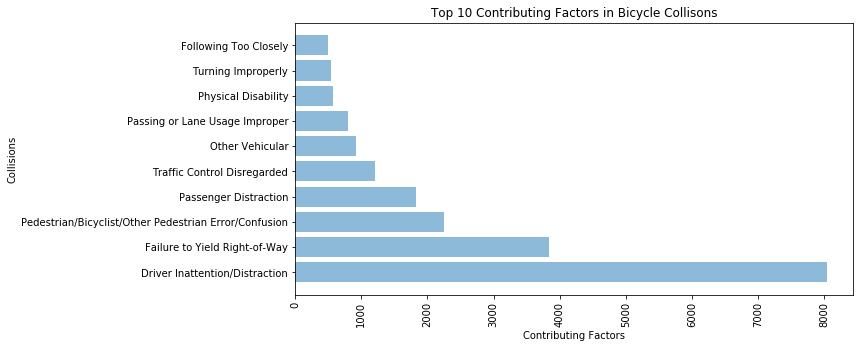

In [7]:
########### PLOT TOP 10 CONTRIBUTING FACTORS IN BICYCLE COLLISIONS ##########
# Get bikecrash factor table
factor=bikecrash.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index()
factor.columns=['FACTOR','COUNT']
# Sort from high to low 
factor=factor.sort_values(by='COUNT',ascending=False)
# Drop Unspecified data
factor=factor[factor['FACTOR']!='Unspecified']
# Plot top 10 contributing factor 
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(factor[0:10]['FACTOR'], factor[0:10]['COUNT'], alpha=0.5)
# rotate x ticks 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)    
ax.set_xlabel("Contributing Factors")
ax.set_ylabel("Collisions")
ax.set_title("Top 10 Contributing Factors in Bicycle Collisons")

C:\Users\Administrator\Anaconda3\envs\forge\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Bicycle Collisions by 1 hour time interval')

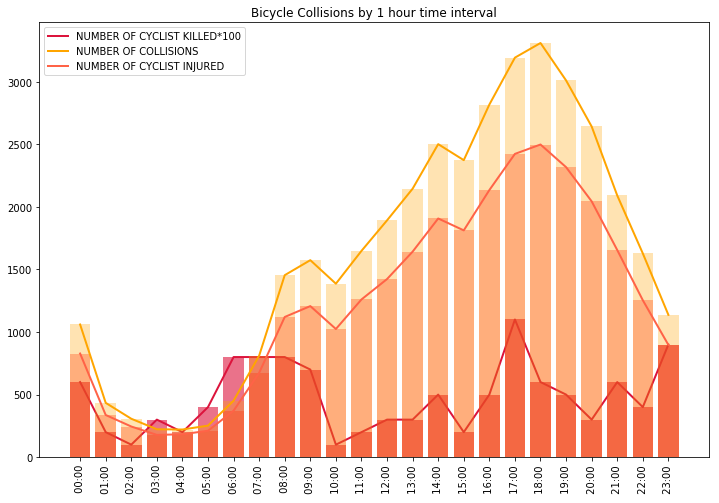

In [28]:
########### TIME ANALYSIS ########
# convert to datetime format
bikecrash['time']=pd.to_datetime(bikecrash['TIME'],format='%H:%M')
bikecrash=bikecrash.set_index('time')
bikecrash['NUMBER OF COLLISIONS']=1
# count number of crash in 1 hour interval 
resample1h=bikecrash.resample('60T',how='sum')
resample1h['times']=resample1h.index.astype(str).str[10:16]
resample1h['NUMBER OF CYCLIST KILLED*100']=resample1h['NUMBER OF CYCLIST KILLED']*100
# PLOT 
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(resample1h.times,resample1h['NUMBER OF CYCLIST KILLED*100'],linewidth=2,color='crimson')
ax.bar(resample1h.times,resample1h['NUMBER OF CYCLIST KILLED*100'],alpha=0.6,color='crimson',zorder=1)
ax.plot(resample1h.times,resample1h['NUMBER OF COLLISIONS'],linewidth=2,color='orange',zorder=5)
ax.bar(resample1h.times,resample1h['NUMBER OF COLLISIONS'],alpha=0.3,color='orange',zorder=3)
ax.bar(resample1h.times,resample1h['NUMBER OF CYCLIST INJURED'],alpha=0.3,color='red',zorder=2)
ax.plot(resample1h.times,resample1h['NUMBER OF CYCLIST INJURED'],linewidth=2,color='tomato',zorder=6)
# rotate x ticks 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)   
ax.legend()
ax.set_title('Bicycle Collisions by 1 hour time interval')

In [10]:
################## CREATE HOT SPOT MAP #################
# Get bicycle crash data from all crash data
bikecrash=crash[(crash['VEHICLE TYPE CODE 1']=='Bike') |(crash['VEHICLE TYPE CODE 1']=='BICYCLE')| (crash['VEHICLE TYPE CODE 2']=='Bike') |(crash['VEHICLE TYPE CODE 2']=='BICYCLE')| (crash['VEHICLE TYPE CODE 3']=='Bike')|(crash['VEHICLE TYPE CODE 3']=='BICYCLE')|(crash['VEHICLE TYPE CODE 4']=='Bike')|(crash['VEHICLE TYPE CODE 4'] == 'BICYCLE')|(crash['VEHICLE TYPE CODE 5']=='Bike')|(crash['VEHICLE TYPE CODE 5']=='BYCICLE')]
# Use the Lat Lon information to convert bikecrash into geodataframe format 
gbike=bikecrash[pd.notnull(bikecrash['LATITUDE'])]
gbike=gbike[gbike['LATITUDE']!=0]
crs={'init': 'epsg:4326'}
geometry=[Point(xy) for xy in zip(gbike.LONGITUDE,gbike.LATITUDE)]
gbike=gpd.GeoDataFrame(gbike,crs=crs,geometry=geometry)
gbike= gbike.to_crs({'init': 'epsg:26918'})

C:\Users\Administrator\Anaconda3\envs\forge\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'nlevels'
  s)


0    Annotation(571686, 4.49257e+06, 'Staten Island')
1        Annotation(587152, 4.51454e+06, 'Manhattan')
2         Annotation(588913, 4.49989e+06, 'Brooklyn')
3           Annotation(599806, 4.50699e+06, 'Queens')
4            Annotation(595496, 4.52301e+06, 'Bronx')
dtype: object

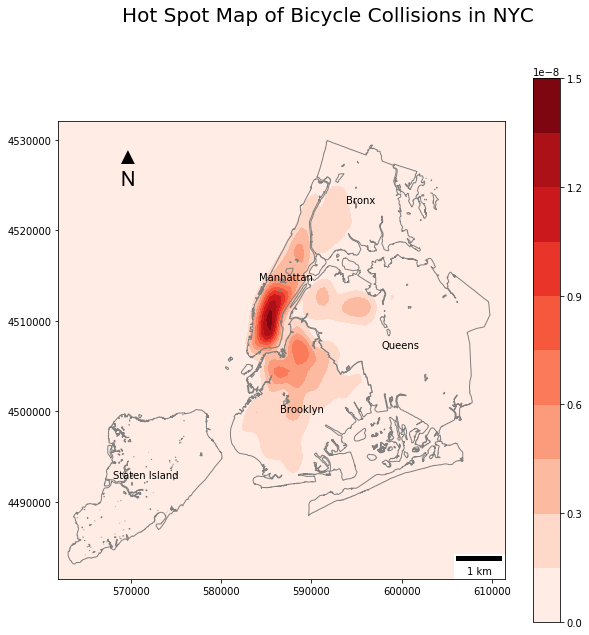

In [11]:
# get kde plot of bicycle collisions 
fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Hot Spot Map of Bicycle Collisions in NYC',fontsize=20)
kde=sns.kdeplot(gbike.geometry.x, gbike.geometry.y, shade=True,nlevels=60,cmap='Reds',cbar=True, ax=ax)
base = district.plot(ax=kde,color='None', edgecolor='0.5',figsize=(16,10))
# add north arrow
ax.text(570000, 4525000,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

0    Annotation(571686, 4.49257e+06, 'Staten Island')
1        Annotation(587152, 4.51454e+06, 'Manhattan')
2         Annotation(588913, 4.49989e+06, 'Brooklyn')
3           Annotation(599806, 4.50699e+06, 'Queens')
4            Annotation(595496, 4.52301e+06, 'Bronx')
dtype: object

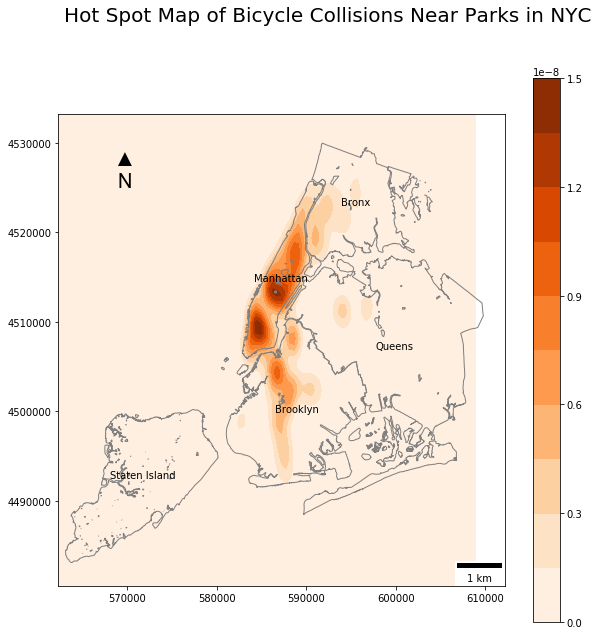

In [14]:
# get kde plot of bicycle collisions within park buffer
# Read bike collision data within park buffer and reproject data 
bikebuffer=gpd.read_file("D:\\USERS\\LSGI\\LSGI535\\project\\collisionbufferbike.shp")
bikebuffer=bikebuffer.to_crs({'init': 'epsg:26918'})
# Plot 
fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Hot Spot Map of Bicycle Collisions Near Parks in NYC',ha='center',fontsize=20)
kde=sns.kdeplot(bikebuffer.geometry.x, bikebuffer.geometry.y, shade=True,cmap='Oranges',cbar=True, ax=ax)
base = district.plot(ax=kde,color='None', edgecolor='0.5',figsize=(16,10))
# add north arrow
ax.text(570000, 4525000,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
#kde.set_facecolor('0.8')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [21]:
# get kde plot of ALL collisions
# convert collision data into geodataframe format 
geometry=[Point(xy) for xy in zip(gcrash.LONGITUDE,gcrash.LATITUDE)]
crs={'init': 'epsg:4326'}
gcrash=crash[pd.notnull(crash['LATITUDE'])]
# convert to geodataframe
gcrash=gpd.GeoDataFrame(gcrash,crs=crs,geometry=geometry)
gcrash= gcrash.to_crs({'init': 'epsg:26918'})
# drop null and unusual data 
gcrash=gcrash[gcrash['LATITUDE']!=0]
gcrash=gcrash[gcrash.geometry.x>500000]

0    Annotation(571686, 4.49257e+06, 'Staten Island')
1        Annotation(587152, 4.51454e+06, 'Manhattan')
2         Annotation(588913, 4.49989e+06, 'Brooklyn')
3           Annotation(599806, 4.50699e+06, 'Queens')
4            Annotation(595496, 4.52301e+06, 'Bronx')
dtype: object

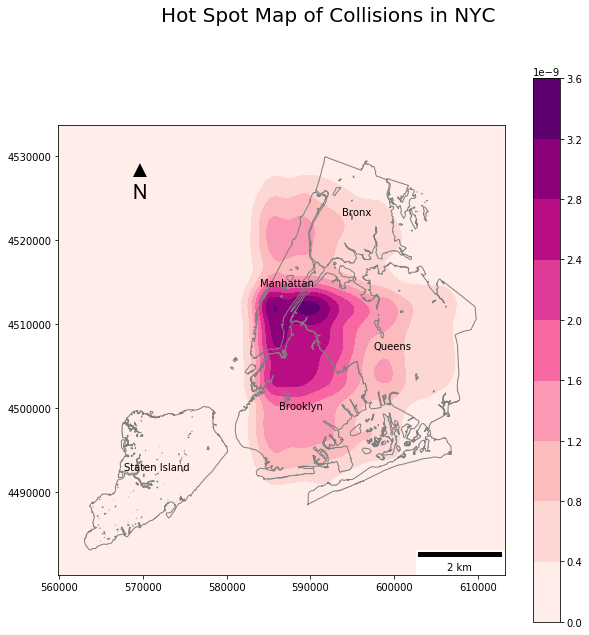

In [22]:
# Plot
fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Hot Spot Map of Collisions in NYC',ha='center',fontsize=20)
kde=sns.kdeplot(gcrash.geometry.x.sample(10000), gcrash.geometry.y.sample(10000), shade=True,cmap='RdPu',cbar=True, ax=ax)
base = district.plot(ax=kde,color='None', edgecolor='0.5',figsize=(16,10))
# add north arrow
ax.text(570000, 4525000,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
#kde.set_facecolor('0.8')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [32]:
############ PLOT MAP WITH MOST REPEATED CRASHES ########
# Use groupby to get repeated collision times at the same location 
repeatbike=gbike.groupby(['LATITUDE','LONGITUDE']).size().reset_index()
repeatbike=repeatbike.sort_values(ascending=False,by=0)

repeatbike.columns=['y','x','num of crash']
# Convert it to Geodataframe format
geometry=[Point(xy) for xy in zip(repeatbike.x,repeatbike.y)]
grepeat=gpd.GeoDataFrame(repeatbike,geometry=geometry)

In [33]:
# Reproject data
grepeat.crs={'init': 'epsg:4326'}
grepeat=grepeat.to_crs({'init': 'epsg:26918'})
# Get the location of collisions that occurs more than 10 times
grepeat10=grepeat[grepeat['num of crash']>10]

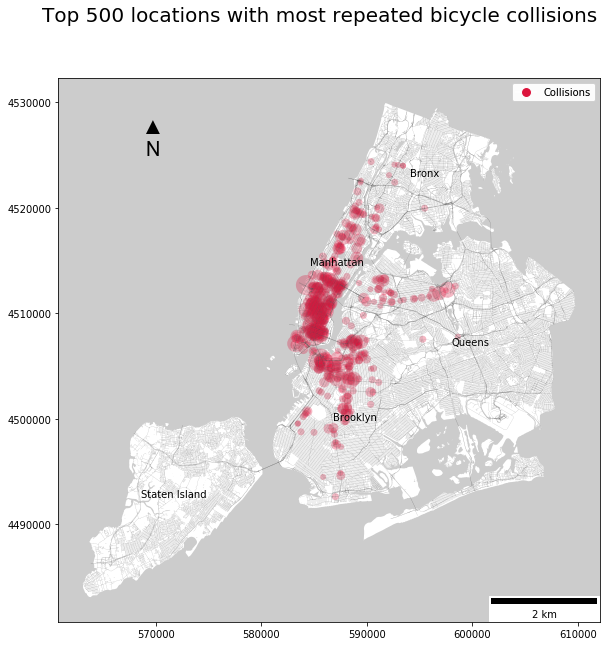

In [35]:
## plot the most top 500 locations with most repeated bicycle collisions ##
fig,ax=plt.subplots(figsize=(10,10))
# plot basemap
base=district.plot(ax=ax,color='white', edgecolor='None')
# only plot top 500 locations, markersize as repeated crime
roadp=road.plot(ax=base,color='0.4',linewidth=0.1)
crp=grepeat[0:500].plot(linewidths=0.0,markersize=grepeat['num of crash']**2,alpha=0.3,color='crimson',figsize=(10,10),ax=base) #plot crime
# add annotate
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
# add title
fig.suptitle("Top 500 locations with most repeated bicycle collisions",fontsize=20)
crp.set_facecolor('0.8')
# add legend 
from matplotlib.lines import Line2D
leg1=ax.legend(loc="upper right",handles=[Line2D([0], [0], marker='o', color='w', label='Collisions', markerfacecolor='crimson', markersize=10)])
plt.gca().add_artist(leg1)
# add north arrow
ax.text(570000, 4525000,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

In [36]:
# Get points of repeated collisions larger than 10 times in Manhattan
manrepeat10=gpd.sjoin(grepeat10,district[district['BoroName']=='Manhattan'])
manrepeat10=manrepeat10.sort_values(by='num of crash',ascending=False)

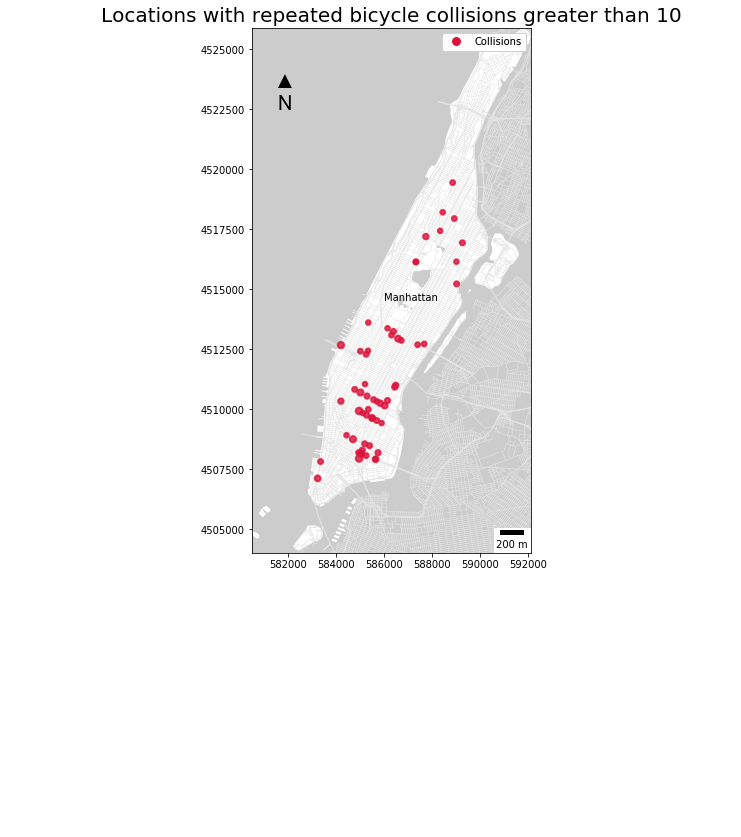

In [38]:
######## repeated collisions larger than 10 in Manhattan #########
fig,ax=plt.subplots()
#figsize=(10,10)
# plot basemap
base=district[district['BoroName']=='Manhattan'].plot(ax=ax,color='white', edgecolor='None',zorder=1)
# plot repeated collisions larger than 10 in Manhattan 
crp=manrepeat10.plot(ax=base,linewidths=0.0,markersize=manrepeat10['num of crash']*2,alpha=0.8,color='crimson',linewidth=2,zorder=4) #plot crime
# Plot road network and park buffer
roadp=road.plot(ax=crp,color='0.9',linewidth=0.6,zorder=2)
parkp=park.plot(ax=roadp,color='lightgreen',alpha=0.5,zorder=3)

# add annotate
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
# add title
ax.set_title("Locations with repeated bicycle collisions greater than 10",fontsize=20)
crp.set_facecolor('0.8')
# Set axis limit around Manhattan borough
ax.set_xlim(district.geometry.bounds.minx[1],district.geometry.bounds.maxx[1])
ax.set_ylim((district.geometry.bounds.miny[1],district.geometry.bounds.maxy[1]))

fig.set_figheight(10)
fig.set_figwidth(5)

# add lagend 
from matplotlib.lines import Line2D
leg1=ax.legend(loc="upper right",handles=[Line2D([0], [0], marker='o', color='w', label='Collisions',
                          markerfacecolor='crimson', markersize=10)])

plt.gca().add_artist(leg1)
# add north arrow
ax.text(582000, 4522500,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

In [23]:
########## ROAD SAFETY LEVEL GENERATION AND MAPPING ######## 
## join bike to entire road network buffer ##
# Read park buffer data
buffer=gpd.read_file("D:\\USERS\\urban_project\\buffer.shp")
buffer=buffer.to_crs({'init': 'epsg:26918'})
# Read road network data 
road=gpd.read_file("D:\\USERS\\urban_project\\roadnetwork.shp")
# Create road network 1m buffer 
roadbuffer=road.buffer(1)
roadbufferg=gpd.GeoDataFrame(road.copy(),crs=road.crs,geometry=roadbuffer)
# join bike collision data to road network 
roadbike=gpd.sjoin(roadbufferg,gbike)

In [24]:
# Count number of bike collisions within each road segment
bikecount=roadbike.groupby(['OBJECTID']).size().reset_index()
bikecount.columns=['OBJECTID','count']
bikesum=roadbike.groupby(['OBJECTID']).sum().reset_index()[['OBJECTID','NUMBER OF CYCLIST KILLED','NUMBER OF CYCLIST INJURED']]
# Merge data to keep bike count in road network
roadbikec=pd.merge(road,bikecount,on='OBJECTID',how='outer')
roadbikec=pd.merge(roadbikec,bikesum,on='OBJECTID',how='outer')
# Set NaN data to 0 
roadbikec['count']=roadbikec['count'].fillna(0)
roadbikec['NUMBER OF CYCLIST KILLED']=roadbikec['NUMBER OF CYCLIST KILLED'].fillna(0)
roadbikec['NUMBER OF CYCLIST INJURED']=roadbikec['NUMBER OF CYCLIST INJURED'].fillna(0)
# Standardize data to collision count per 100 meter
roadbikec['CollisionsPer100m']=100*roadbikec['count']/roadbikec['SHAPE_Leng']

In [25]:
# Get bike count within park buffer
bikebuffer=gpd.sjoin(roadbikec,buffer,op='within')
# Get bike count outside park buffer
bikeout = roadbikec[~roadbikec.index.isin(bikebuffer.index)]

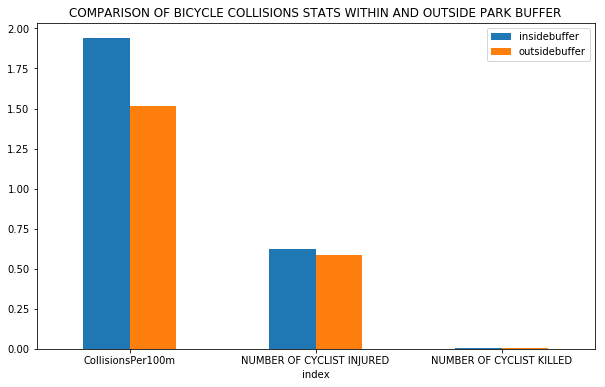

In [26]:
###### COMPARISON BETWEEN BICYCLE COLLISIONS WITHIN AND OUTISDE PARK BUFFER ##### 
# Subset data
bikebuffers=bikebuffer[['CollisionsPer100m','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED']]
bikeouts=bikeout[['CollisionsPer100m','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED']]
# Plot bike crash data within buffer and out side buffer 
graph=bikebuffers.mean(axis=0).reset_index()
graph.columns=['index','insidebuffer']
graph['outsidebuffer']=bikeouts.mean(axis=0).reset_index()[0]
graph=graph.set_index('index')
graph.plot.bar(rot=0,figsize=(10,6),title='COMPARISON OF BICYCLE COLLISIONS STATS WITHIN AND OUTSIDE PARK BUFFER')

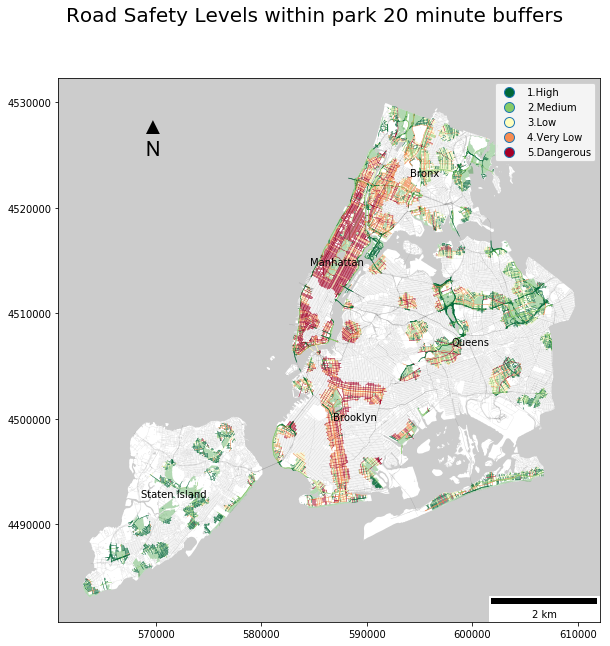

In [133]:
# combine unified bike count data by street segment into the entire street 
dissolve_=bikebuffer.dissolve(by='Street',aggfunc='mean')
# Categorize Data into 5 levels by quantile 
cat=pd.cut(dissolve_.CollisionsPer100m,[-0.1,0,0.32,1.01,2.95,135],labels=['1.High','2.Medium','3.Low','4.Very Low','5.Dangerous'])
cat=cat.reset_index()
cat.columns=['Street','Levels']
dissolvecat=pd.merge(dissolve1,cat,on='Street')
# plot the most repeated crimes and stop & frisk locations
fig,ax=plt.subplots(figsize=(16,10))
# plot basemap
base=district.plot(ax=ax,color='white', edgecolor='None')
# only plot top 100 locations, markersize as repeated crime
roadp=road.plot(ax=base,color='0.4',alpha=0.2,linewidth=0.3)
parkp=park.plot(ax=ax,alpha=0.3,color='green')
crp=dissolvecat.plot(column='Levels',linewidths=0.5,cmap='RdYlGn_r',ax=base,legend=True) #plot crime

# add annotate
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
# add title
fig.suptitle("Road Safety Levels within park 20 minute buffers",fontsize=20)
crp.set_facecolor('0.8')

# add north arrow
ax.text(570000, 4525000,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

In [134]:
fig.savefig("D:\\USERS\\urban_project\\levels1.png",dpi=200,bbox_inches='tight')

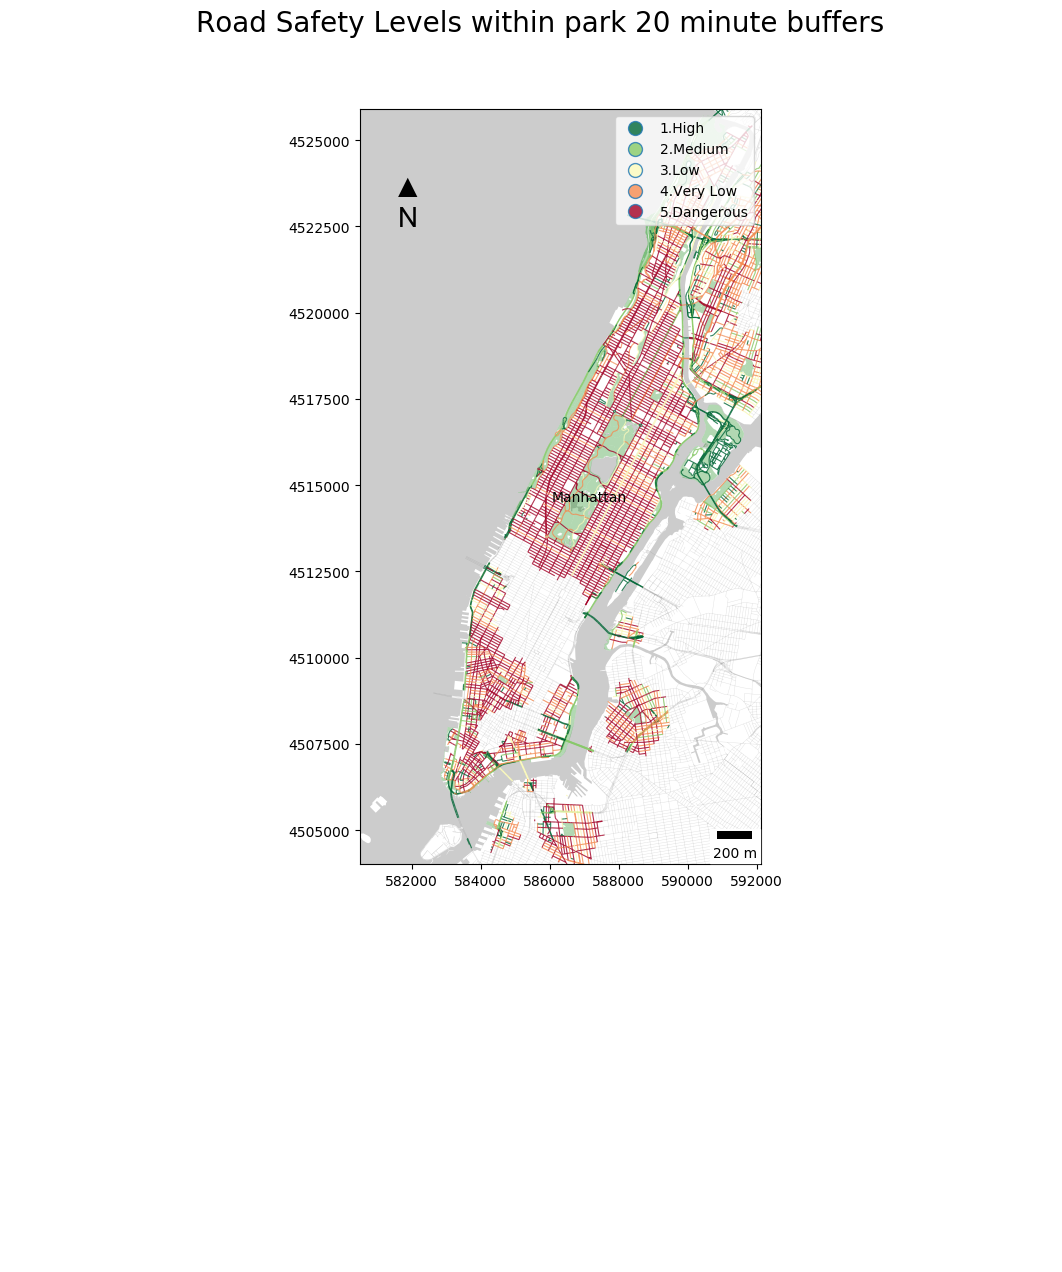

In [135]:
############MANHATTAN###############
fig,ax=plt.subplots(figsize=(16,10))
fig.dpi=100
# plot basemap
base=district.plot(ax=ax,color='white', edgecolor='None')
#base = district.plot(ax=ax,color='white', edgecolor='None')
# only plot top 100 locations, markersize as repeated crime
roadp=road.plot(ax=base,color='0.4',alpha=0.2,linewidth=0.3)
parkp=park.plot(ax=ax,alpha=0.3,color='green')
crp=dissolvecat.plot(column='Levels',linewidths=0.8
,alpha=0.8,cmap='RdYlGn_r',ax=base,legend=True) #plot crime

# add annotate
district.apply(lambda x: plt.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
# add title
fig.suptitle("Road Safety Levels within park 20 minute buffers",fontsize=20)
ax.set_xlim(district.geometry.bounds.minx[1],district.geometry.bounds.maxx[1])
ax.set_ylim((district.geometry.bounds.miny[1],district.geometry.bounds.maxy[1]))
crp.set_facecolor('0.8')

# add north arrow
ax.text(582000, 4522500,u'\u25B2 \nN ', ha='center', fontsize=20,family='Arial')
# add scale bar
from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(0.2,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

In [136]:
fig.savefig("D:\\USERS\\urban_project\\manhattanlevels.png",dpi=200,bbox_inches='tight')